# Assignment 3
# Group Members 
# Yussuf Seifudin 660411
# Kamau John 658561

In [4]:
import pandas as pd
import numpy as np

In [2]:
diabetes_data = pd.read_csv("C:\\Users\DELL\Downloads\dwn\diabetes.csv")

# Data Cleaning by converting 0's to null values

In [5]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns] = diabetes_data[columns].replace({0:np.nan})

In [6]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
X = diabetes_data.drop("Outcome", axis = 1)
y = diabetes_data['Outcome']

# Splitting the dataset into train and set split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)


# Replacing all the null values with medians

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train.median().values

array([  3.   , 116.   ,  72.   ,  29.   , 125.   ,  32.5  ,   0.364,
        29.   ])

In [36]:
# Transform the training data by replacing nulls with medians
X_train_tr = imputer.transform(X_train)
# convert np array to pd df
X_train_transform_df = pd.DataFrame(X_train_tr, columns = X_train.columns, index = X_train.index) 

In [37]:
X_train_transform_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
455,14.0,175.0,62.0,30.0,125.0,33.6,0.212,38.0
611,3.0,174.0,58.0,22.0,194.0,32.9,0.593,36.0
578,10.0,133.0,68.0,29.0,125.0,27.0,0.245,36.0
711,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0
499,6.0,154.0,74.0,32.0,193.0,29.3,0.839,39.0


#  Standardize the dataset to balance it with the Outcome target

In [19]:
# Standadize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transform2 = scaler.fit_transform(X_train_transform_df) # This returns a numpy array
X_train_transform2_df = pd.DataFrame(X_train_transform2, columns = X_train.columns, index = X_train.index)
X_train_transform2_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
455,3.067243,1.781951,-0.826305,0.109320,-0.165202,0.140814,-0.764916,0.448125
611,-0.244062,1.749072,-1.158674,-0.785431,0.695773,0.040307,0.389314,0.273779
578,1.863132,0.401050,-0.327752,-0.002524,-0.165202,-0.806822,-0.664943,0.273779
711,0.357993,0.170900,0.503169,-0.226212,-1.450426,-0.433511,-0.077225,0.622472
499,0.659021,1.091500,0.170801,0.333007,0.683295,-0.476585,1.134564,0.535299


In [20]:
# Replace nulls with medians in the test set
X_test_transform = imputer.transform(X_test)   
# convert np array to pd df
X_test_transform_df = pd.DataFrame(X_test_transform, columns=X_test.columns, index=X_test.index) 
X_test_transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 353 to 358
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               192 non-null    float64
 1   Glucose                   192 non-null    float64
 2   BloodPressure             192 non-null    float64
 3   SkinThickness             192 non-null    float64
 4   Insulin                   192 non-null    float64
 5   BMI                       192 non-null    float64
 6   DiabetesPedigreeFunction  192 non-null    float64
 7   Age                       192 non-null    float64
dtypes: float64(8)
memory usage: 13.5 KB


In [21]:
X_test_transform_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0
236,7.0,181.0,84.0,21.0,192.0,35.9,0.586,51.0
323,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0
98,6.0,93.0,50.0,30.0,64.0,28.7,0.356,23.0
701,6.0,125.0,78.0,31.0,125.0,27.6,0.565,49.0


In [24]:
# Scale the test set
X_test_transform2 = scaler.fit_transform(X_test_transform_df) # This returns a numpy array
X_test_transform2_df = pd.DataFrame(X_test_transform2, columns=X_test.columns, index=X_test.index)
X_test_transform2_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,-0.842714,-1.128791,-0.963844,-2.093100,-1.025846,-0.728169,0.258025,-0.831589
236,0.872491,1.875357,0.846417,-1.008254,0.430312,0.598692,0.276033,1.330376
323,2.587697,0.917991,1.340125,0.438207,-1.162666,-0.789174,0.711232,0.689794
98,0.586624,-1.029753,-1.951259,0.076592,-0.820616,-0.499400,-0.414284,-0.911662
701,0.586624,0.026651,0.352710,0.197131,-0.224471,-0.667164,0.213004,1.170231


# Training our model using RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_transform2_df, y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
from sklearn import metrics

rfc_train = rfc.predict(X_train_transform2_df)
print("Random Forest Classifier Accuracy Score using the Train sets =", format(metrics.accuracy_score(y_train, rfc_train)))

Random Forest Classifier Accuracy Score using the Train sets = 1.0


The above model is overfitted against the train set

In [35]:
predictions = rfc.predict(X_test_transform2_df)
print("Random Forest Classifier Accuracy Score using teh test sets =", format(metrics.accuracy_score(y_test, predictions)))

Random Forest Classifier Accuracy Score using teh test sets = 0.7760416666666666


# Scoring our Accuracy using the DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree.fit(X_train_transform2_df, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
predictions = dtree.predict(X_test_transform2_df)
print("Decision Tree Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Decision Tree Accuracy Score = 0.6927083333333334


# Plotting our DecisionTree

In [51]:
features = X.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

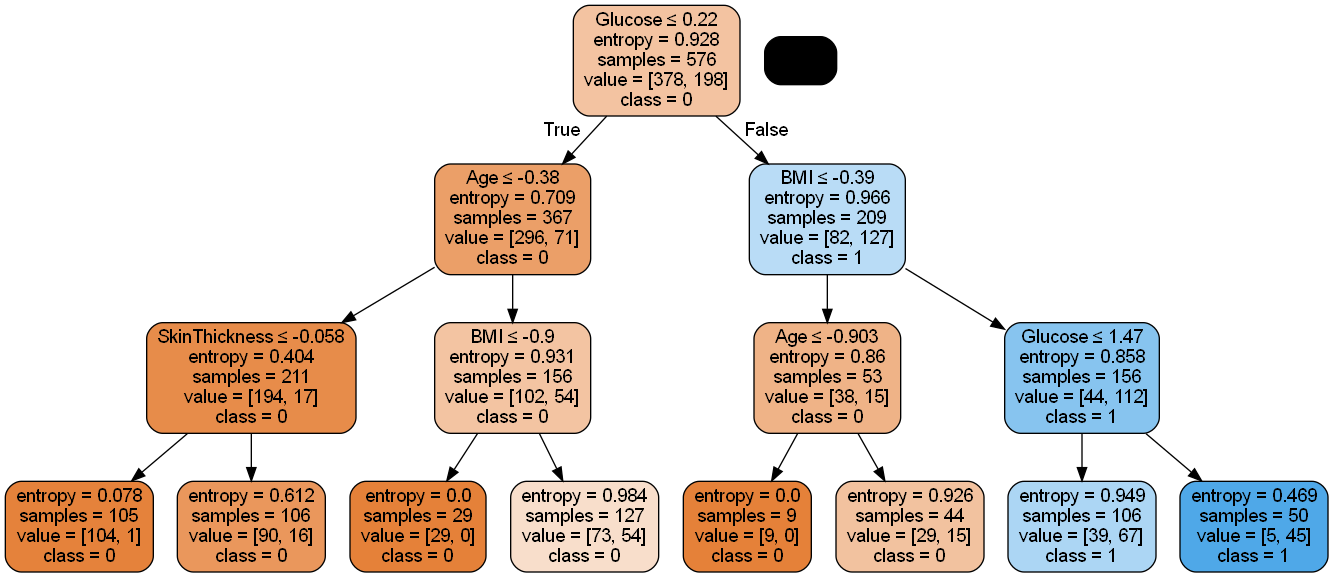

In [52]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())